In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **PREPARE DATASET 1** #
Preparing IPL Auction Data

In [ ]:
auction = pd.read_csv('input_auction.csv',  encoding='windows-1252')
auction.head(10)

,Season,Name,Nationality,Type,Team,Price
0,2023,Ajinkya Rahane,Indian,Batsman,Chennai Super Kings,"50,00,000"
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,"1,00,00,000"
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,"60,00,000"
5,2023,Shaik Rasheed,Indian,Batsman,Chennai Super Kings,"20,00,000"
6,2023,Ben Stokes,Overseas,All-Rounder,Chennai Super Kings,"16,25,00,000"
7,2023,Phil Salt,Overseas,WC,Delhi Capitals,"2,00,00,000"
8,2023,Ishant Sharma,Indian,Bowler,Delhi Capitals,"50,00,000"
9,2023,Rilee Rossouw,Overseas,Batsman,Delhi Capitals,"4,60,00,000"


<Axes: >

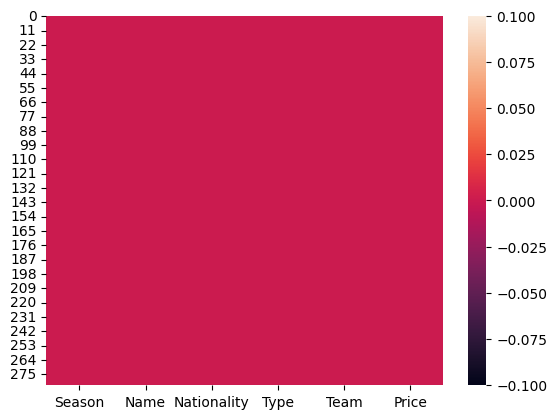

In [ ]:
import seaborn as sb
sb.heatmap(auction.isnull())

Pre-processing Data:
1. Converting Price type to float
2. Converted Nationality and Type into binary

In [ ]:
auction['Price'] = auction['Price'].str.replace(',', '').str.replace('$', '').astype(float)

<ipython-input-276-a3e8d6fc0527>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  auction['Price'] = auction['Price'].str.replace(',', '').str.replace('$', '').astype(float)


In [ ]:
nationalityDummy = pd.get_dummies(auction['Nationality'])
typeColumnDummy = pd.get_dummies(auction['Type'])
auction = pd.concat((auction, nationalityDummy, typeColumnDummy), axis = 1)
auction.head()


,Season,Name,Nationality,Type,Team,Price,Indian,Overseas,All-Rounder,Batsman,Bowler,WC
0,2023,Ajinkya Rahane,Indian,Batsman,Chennai Super Kings,5000000.0,1,0,0,1,0,0
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,2000000.0,1,0,1,0,0,0
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,10000000.0,0,1,0,0,1,0
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,2000000.0,1,0,1,0,0,0
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,6000000.0,1,0,1,0,0,0


In [ ]:
auction['Season'].replace({2022: 2023}, inplace=True)

In [ ]:
auction = auction.drop(['Type', 'Nationality'], axis = 1)

In [ ]:
# adding player ID
auction['player_id'] = auction['Name'].rank(method='dense', ascending=False).astype(int)
auction.head()

,Season,Name,Team,Price,Indian,Overseas,All-Rounder,Batsman,Bowler,WC,player_id
0,2023,Ajinkya Rahane,Chennai Super Kings,5000000.0,1,0,0,1,0,0,257
1,2023,Bhagath Varma,Chennai Super Kings,2000000.0,1,0,1,0,0,0,227
2,2023,Kyle Jamieson,Chennai Super Kings,10000000.0,0,1,0,0,1,0,149
3,2023,Ajay Mandal,Chennai Super Kings,2000000.0,1,0,1,0,0,0,258
4,2023,Nishant Sindhu,Chennai Super Kings,6000000.0,1,0,1,0,0,0,108


In [ ]:
# this is to encode the team name
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
le = LabelEncoder()
auction['Team'] = le.fit_transform(auction['Team'])
label_encoders['Team'] = le


In [ ]:
# Define bin edges based on the criteria
# Define the labels for the bins
# Convert the 'expensive' column to int type
# Create a new column 'expensive' with the appropriate category for each 'Price' value

price_range = [0, 10000000, 40000000, 60000000, 80000000, 100000000, float('inf')]
price_label = [1, 2, 3, 4, 5, 6]

auction['expensive'] = pd.cut(auction['Price'], bins=price_range, labels=price_label, right=False)


In [ ]:
auction.head(10)

,Season,Name,Team,Price,Indian,Overseas,All-Rounder,Batsman,Bowler,WC,player_id,expensive
0,2023,Ajinkya Rahane,0,5000000.0,1,0,0,1,0,0,257,1
1,2023,Bhagath Varma,0,2000000.0,1,0,1,0,0,0,227,1
2,2023,Kyle Jamieson,0,10000000.0,0,1,0,0,1,0,149,2
3,2023,Ajay Mandal,0,2000000.0,1,0,1,0,0,0,258,1
4,2023,Nishant Sindhu,0,6000000.0,1,0,1,0,0,0,108,1
5,2023,Shaik Rasheed,0,2000000.0,1,0,0,1,0,0,53,1
6,2023,Ben Stokes,0,162500000.0,0,1,1,0,0,0,229,6
7,2023,Phil Salt,1,20000000.0,0,1,0,0,0,1,101,2
8,2023,Ishant Sharma,1,5000000.0,1,0,0,0,1,0,182,1
9,2023,Rilee Rossouw,1,46000000.0,0,1,0,1,0,0,74,3


### Deciding X = Indian, Overseas, All-Rounder, Batsman, Bowler, WC and Y = Price for Classifier

In [ ]:
X = auction.values
Y = auction['expensive'].values

In [ ]:
# remove Season Name, Team and Pirce from X
columns_to_remove = [0, 1, 3] # remove expensive as well
X = np.delete(X, columns_to_remove, axis=1)
print(X)

[[0 0 1 ... 0 257 1]
 [0 0 0 ... 0 227 1]
 [1 0 0 ... 0 149 2]
 ...
 [0 1 0 ... 0 90 1]
 [0 0 0 ... 0 49 1]
 [0 0 0 ... 0 58 1]]


In [ ]:
X_dataset1 = X
Y_dataset1 = Y

# Running MULLER LOOP for Dataset 1 (Auction Data) #

In [ ]:
# Modified from ...
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = X_dataset1, Y_dataset1

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)

# TODO (Apply): All cross-validation
results_1 = []

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    elapsed_time = time.time() - start_time
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))

    results_1.append({
        'Classifier': name,
        'Score': score,
        'Training Time': elapsed_time
    })

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 54.39, Training time = 0.01 seconds
Classifier = Linear SVM, Score (test, accuracy) = 49.12, Training time = 0.00 seconds
Classifier = RBF SVM, Score (test, accuracy) = 56.14, Training time = 0.01 seconds
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.00 seconds
Classifier = Random Forest, Score (test, accuracy) = 66.67, Training time = 0.01 seconds
Classifier = Neural Net, Score (test, accuracy) = 80.70, Training time = 0.59 seconds
Classifier = AdaBoost, Score (test, accuracy) = 71.93, Training time = 0.07 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 98.25, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 52.63, Training time = 0.00 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Decision Tree, Score (test, accuracy) = 100.00


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# **Running Individual Classifiers for all the group members** #

### Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

classifier_run_1 = []
classifier_run_2 = []

Individual Classifier: Raghav
### **Build Random Forest Classifier**

In [ ]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, Y_train)
score = rf_clf.score(X_test, Y_test)
classifier_run_1.append({
        'Classifier': "Random Forest",
        'Score': score,
    })

Individual Classifier: Aishwarya
### K-Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier(n_neighbors=3)
kn_clf.fit(X_train, Y_train)
score = kn_clf.score(X_test, Y_test)
classifier_run_1.append({
        'Classifier': "K-Nearest Neighbor",
        'Score': score,
    })

Individual Classifier: Srinishaa
### Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, Y_train)
score = lr_clf.score(X_test, Y_test)
classifier_run_1.append({
        'Classifier': "Logistic Regression",
        'Score': score,
    })

Individual Classifier: Rishabh
### SVM Classifier

In [ ]:
from sklearn.svm import SVC
sv_clf = SVC(probability=True)
sv_clf.fit(X_train, Y_train)
score = sv_clf.score(X_test, Y_test)
classifier_run_1.append({
        'Classifier': "SVM",
        'Score': score,
    })

# **PREPARE DATASET 2: BATSMAN** #

In [ ]:
batsmen = pd.read_csv('IPL2023_Batsman.csv',  encoding='windows-1252')
batsmen.head()

,match_no,Batsman,team,Run,Ball,4s,6s,out_by
0,1,Devon Conway,Chennai Super Kings,1,6,0,0,Mohammed Shami
1,1,Ruturaj Gaikwad,Chennai Super Kings,92,50,4,9,Alzarri Joseph
2,1,Moeen Ali,Chennai Super Kings,23,17,4,1,Rashid Khan
3,1,Ben Stokes,Chennai Super Kings,7,6,1,0,Rashid Khan
4,1,Ambati Rayudu,Chennai Super Kings,12,12,0,1,Joshua Little


## Pre-processing data for Batsman dataset ##

In [ ]:

df = batsmen

# Group the data by 'Batsman'
grouped = df.groupby('Batsman')

# Calculate the required statistics
result = grouped.agg({
    'Run': 'sum',            # Total runs
    'Ball': 'sum',           # Total balls
    'match_no': 'nunique',   # Matches played (count unique match numbers)
    '4s': 'sum',             # Total 4s
    '6s': 'sum'              # Total 6s
}).reset_index()             # Reset the index to get 'Batsman' as a regular column

# Add a new column 'Not_Out' counting instances of 'Not Out' in 'out_by'
df['Not_Out'] = df['out_by'].apply(lambda x: 1 if x == 'Not Out' else 0)

# Group and sum the 'Not_Out' column for each player
not_out_counts = df.groupby('Batsman')['Not_Out'].sum().reset_index()

# Merge the not_out_counts with the result DataFrame
result = result.merge(not_out_counts, on='Batsman', how='left')
result['Strike_Rate'] = (result['Run'] / result['Ball']) * 100

# Calculate the 'Average' while avoiding division by zero
result['Average'] = result.apply(lambda row: row['Run'] / (row['match_no'] - row['Not_Out']) if (row['match_no'] - row['Not_Out']) != 0 else 0, axis=1)

# Rename columns for clarity
result.rename(columns={'match_no': 'Matches_Played', 'Not_Out': 'Not_Out_Count'}, inplace=True)

# Print the resulting DataFrame
result.head(1000)


,Batsman,Run,Ball,Matches_Played,4s,6s,Not_Out_Count,Strike_Rate,Average
0,Abdul Basith,1,1,1,0,0,1,100.000000,0.000000
1,Abdul Samad,169,128,8,10,11,4,132.031250,42.250000
2,Abhinav Manohar,114,83,6,6,7,0,137.349398,19.000000
3,Abhishek Sharma,225,157,11,28,6,0,143.312102,20.454545
4,Abishek Porel,33,31,4,1,0,0,106.451613,8.250000
...,...,...,...,...,...,...,...,...,...
171,Wayne Parnell,2,5,1,0,0,0,40.000000,2.000000
172,Wriddhiman Saha,287,221,14,37,7,1,129.864253,22.076923
173,Yash Dhull,16,23,3,1,0,0,69.565217,5.333333
174,Yashasvi Jaiswal,625,382,14,83,26,1,163.612565,48.076923


# **AMALGAMATE DATASET 1 & 2** #

In [ ]:
auction_batsman_combined_dataset = pd.merge(auction, result, left_on='Name', right_on='Batsman', how='left')
auction_batsman_combined_dataset = auction_batsman_combined_dataset.drop(['Batsman_y', 'player_id', 'Team'], axis = 1)
# auction_batsman_combined_dataset = pd.merge(auction, batsmen, left_on='Name', right_on='Batsman', how='left')
auction_batsman_combined_dataset.fillna(0, inplace=True)
auction_batsman_combined_dataset.head(100)

,Season,Name,Price,Indian,Overseas,All-Rounder,Batsman_x,Bowler,WC,expensive,Run,Ball,Matches_Played,4s,6s,Not_Out_Count,Strike_Rate,Average
0,2023,Ajinkya Rahane,5000000.0,1,0,0,1,0,0,1,282.0,166.0,9.0,22.0,13.0,1.0,169.879518,35.25
1,2023,Bhagath Varma,2000000.0,1,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
2,2023,Kyle Jamieson,10000000.0,0,1,0,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
3,2023,Ajay Mandal,2000000.0,1,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
4,2023,Nishant Sindhu,6000000.0,1,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023,Mitchell Santner,19000000.0,0,1,1,0,0,0,2,2.0,4.0,2.0,0.0,0.0,2.0,50.000000,0.00
96,2023,Adam Milne,19000000.0,0,1,0,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
97,2023,Subhranshu Senapati,2000000.0,1,0,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
98,2023,Mukesh Choudhary,2000000.0,1,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00


# Deciding X and Y = Price #

In [ ]:
X = auction_batsman_combined_dataset.values
Y = auction_batsman_combined_dataset['expensive'].values
# remove Season Name, Team and Pirce from X
columns_to_remove = [0, 1, 3]
X = np.delete(X, columns_to_remove, axis=1)
X_dataset2 = X
Y_dataset2 = Y

# Running MULLER LOOP for Amalgamated Dataset 1 & 2 #

In [ ]:
# Modified from ...
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = X_dataset2, Y_dataset2

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)

# TODO (Apply): All cross-validation
results_12 = []

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    elapsed_time = time.time() - start_time
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))

    results_12.append({
        'Classifier': name,
        'Score': score,
        'Training Time': elapsed_time
    })

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 66.67, Training time = 0.01 seconds
Classifier = Linear SVM, Score (test, accuracy) = 64.91, Training time = 0.00 seconds
Classifier = RBF SVM, Score (test, accuracy) = 61.40, Training time = 0.01 seconds
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.00 seconds
Classifier = Random Forest, Score (test, accuracy) = 66.67, Training time = 0.01 seconds
Classifier = Neural Net, Score (test, accuracy) = 92.98, Training time = 0.84 seconds
Classifier = AdaBoost, Score (test, accuracy) = 78.95, Training time = 0.09 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 96.49, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 91.23, Training time = 0.00 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Decision Tree, Score (test, accuracy) = 100.00


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Running Individual Classifiers for all the group members #

### Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset2,Y_dataset2, test_size = 0.2, random_state=0)

Individual Classifier: Raghav
### **Build Random Forest Classifier**

In [ ]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, Y_train)
score = rf_clf.score(X_test, Y_test)
classifier_run_2.append({
        'Classifier': "Random Forest",
        'Score': score,
    })

Individual Classifier: Aishwarya
### K-Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier(n_neighbors=3)
kn_clf.fit(X_train, Y_train)
score = kn_clf.score(X_test, Y_test)
classifier_run_2.append({
        'Classifier': "K-Nearest Neighbor",
        'Score': score,
    })

Individual Classifier: Srinishaa
### Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, Y_train)
score = lr_clf.score(X_test, Y_test)
classifier_run_2.append({
        'Classifier': "Logistic Regression",
        'Score': score,
    })

Individual Classifier: Rishabh
### SVM Classifier

In [ ]:
from sklearn.svm import SVC
sv_clf = SVC(probability=True)
sv_clf.fit(X_train, Y_train)
score = sv_clf.score(X_test, Y_test)
classifier_run_2.append({
        'Classifier': "SVM",
        'Score': score,
    })

# Comparing the performance of individual classifiers for Dataset 1 and Dataset 12 #

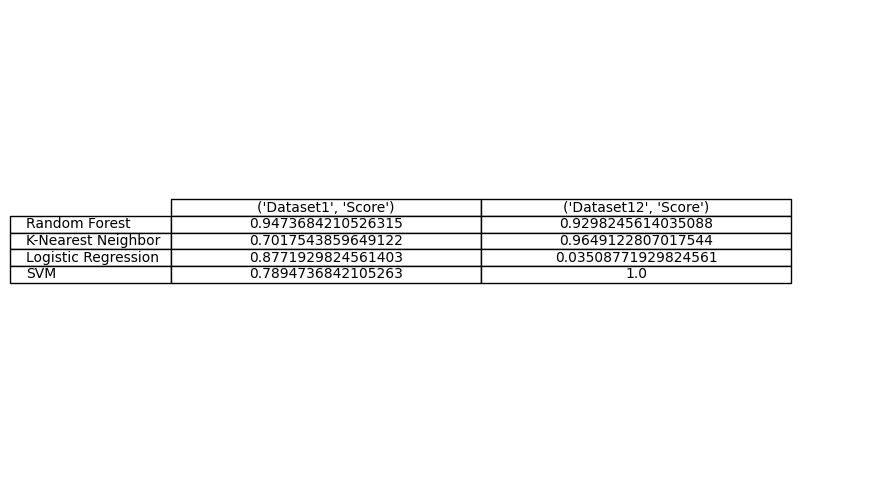

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert each results list to a DataFrame
df1 = pd.DataFrame(classifier_run_1).set_index('Classifier')
df2 = pd.DataFrame(classifier_run_2).set_index('Classifier')

# Combine the DataFrames
combined_df = pd.concat([df1, df2], axis=1, keys=['Dataset1', 'Dataset12'])

# Plot the combined DataFrame as a table
fig, ax = plt.subplots(figsize=(10, 6))  # set the size of the figure
ax.axis('off')  # turn off the axis
ax.table(cellText=combined_df.values,
         colLabels=combined_df.columns,
         rowLabels=combined_df.index,
         cellLoc='center', loc='center',
         colWidths=[0.4, 0.4, 0.4, 0.4, 0.4, 0.4])

plt.show()

# **PREPARE DATASET 3: BOWLER** #

In [ ]:
bowlers = pd.read_csv('IPL2023_Bowler.csv',  encoding='windows-1252')
bowlers.head()

,match_no,Bowler,team,over,run,wicket,No_ball,ECO
0,1,Mohammed Shami,Gujarat Titans,4.0,29,2,1,7.3
1,1,Hardik Pandya,Gujarat Titans,3.0,28,0,0,9.3
2,1,Joshua Little,Gujarat Titans,4.0,41,1,0,10.3
3,1,Rashid Khan,Gujarat Titans,4.0,26,2,0,6.5
4,1,Alzarri Joseph,Gujarat Titans,4.0,33,2,0,8.3


## Pre-processing data for Bowler dataset ##

In [ ]:
agg_funcs = {
    'match_no': 'nunique',   # Count unique match numbers
    'over': 'sum',           # Sum total_overs
    'run': 'sum',            # Sum total_runs
    'wicket': 'sum',         # Sum total_wickets
    'No_ball': 'sum',        # Sum total_no_ball
    'ECO': 'mean'            # Calculate ECO as mean of ECO column
}

bowlers = bowlers.groupby('Bowler').agg(agg_funcs).reset_index()

# Rename the columns to match your desired column names
bowlers = bowlers.rename(columns={
    'match_no': 'matches_played',
    'over': 'total_overs',
    'run': 'total_runs',
    'wicket': 'total_wickets',
    'No_ball': 'total_no_ball',
    'ECO': 'ECO'
})

# If you want to reset the index, you can use the following line:
# result_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
bowlers.head()

,Bowler,matches_played,total_overs,total_runs,total_wickets,total_no_ball,ECO
0,Abhishek Sharma,5,12.0,124,2,0,10.500000
1,Adam Zampa,6,22.0,188,8,0,8.700000
2,Adil Rashid,2,7.0,56,2,0,8.000000
3,Aiden Markram,6,8.1,70,1,0,9.333333
4,Akash Deep,2,5.0,59,1,2,12.350000


# **AMALGAMATE DATASET 1 & 2 & 3** #

In [ ]:
auction_batsman_bowler_combined_dataset = pd.merge(auction_batsman_combined_dataset, bowlers, left_on='Name', right_on='Bowler', how='left')
auction_batsman_bowler_combined_dataset = auction_batsman_bowler_combined_dataset.drop(['Bowler_y'], axis = 1)
auction_batsman_bowler_combined_dataset.head()



,Season,Name,Price,Indian,Overseas,All-Rounder,Batsman_x,Bowler_x,WC,expensive,...,6s,Not_Out_Count,Strike_Rate,Average,matches_played,total_overs,total_runs,total_wickets,total_no_ball,ECO
0,2023,Ajinkya Rahane,5000000.0,1,0,0,1,0,0,1,...,13.0,1.0,169.879518,35.25,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,Bhagath Varma,2000000.0,1,0,1,0,0,0,1,...,0.0,0.0,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,Kyle Jamieson,10000000.0,0,1,0,0,1,0,2,...,0.0,0.0,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,Ajay Mandal,2000000.0,1,0,1,0,0,0,1,...,0.0,0.0,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,Nishant Sindhu,6000000.0,1,0,1,0,0,0,1,...,0.0,0.0,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
auction_batsman_bowler_combined_dataset.dtypes
auction_batsman_bowler_combined_dataset.fillna(0, inplace=True)

In [ ]:
auction_batsman_bowler_combined_dataset['total_match'] = np.maximum(auction_batsman_bowler_combined_dataset['Matches_Played'], auction_batsman_bowler_combined_dataset['matches_played'])
auction_batsman_bowler_combined_dataset.head(10)

,Season,Name,Price,Indian,Overseas,All-Rounder,Batsman_x,Bowler_x,WC,expensive,...,Not_Out_Count,Strike_Rate,Average,matches_played,total_overs,total_runs,total_wickets,total_no_ball,ECO,total_match
0,2023,Ajinkya Rahane,5000000.0,1,0,0,1,0,0,1,...,1.0,169.879518,35.250000,0.0,0.0,0.0,0.0,0.0,0.0000,9.0
1,2023,Bhagath Varma,2000000.0,1,0,1,0,0,0,1,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
2,2023,Kyle Jamieson,10000000.0,0,1,0,0,1,0,2,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
3,2023,Ajay Mandal,2000000.0,1,0,1,0,0,0,1,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
4,2023,Nishant Sindhu,6000000.0,1,0,1,0,0,0,1,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
5,2023,Shaik Rasheed,2000000.0,1,0,0,1,0,0,1,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
6,2023,Ben Stokes,162500000.0,0,1,1,0,0,0,6,...,0.0,107.142857,7.500000,1.0,1.0,18.0,0.0,0.0,18.0000,2.0
7,2023,Phil Salt,20000000.0,0,1,0,0,0,1,2,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
8,2023,Ishant Sharma,5000000.0,1,0,0,0,1,0,1,...,1.0,100.000000,0.000000,8.0,25.0,206.0,10.0,0.0,8.6375,8.0
9,2023,Rilee Rossouw,46000000.0,0,1,0,1,0,0,3,...,2.0,148.226950,29.857143,0.0,0.0,0.0,0.0,0.0,0.0000,9.0


In [ ]:
auction_batsman_bowler_combined_dataset = auction_batsman_bowler_combined_dataset.drop(['Matches_Played', 'matches_played'], axis = 1)

# Deciding X and Y = Price #

In [ ]:
X = auction_batsman_bowler_combined_dataset.values
Y = auction_batsman_bowler_combined_dataset['expensive'].values
columns_to_remove = [0, 1, 3]
X = np.delete(X, columns_to_remove, axis=1)
X_dataset3 = X
Y_dataset3 = Y

# Running MULLER LOOP for Amalgamated Dataset 1 & 2 & 3 #

In [ ]:
# Modified from ...
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = X_dataset3, Y_dataset3

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)

# TODO (Apply): All cross-validation
results_123 = []



max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    elapsed_time = time.time() - start_time
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))

    results_123.append({
        'Classifier': name,
        'Score': score,
        'Training Time': elapsed_time
    })

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(results_123)
print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 52.63, Training time = 0.01 seconds
Classifier = Linear SVM, Score (test, accuracy) = 52.63, Training time = 0.01 seconds
Classifier = RBF SVM, Score (test, accuracy) = 54.39, Training time = 0.01 seconds
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.00 seconds
Classifier = Random Forest, Score (test, accuracy) = 66.67, Training time = 0.02 seconds
Classifier = Neural Net, Score (test, accuracy) = 82.46, Training time = 2.32 seconds
Classifier = AdaBoost, Score (test, accuracy) = 70.18, Training time = 0.16 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 92.98, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 77.19, Training time = 0.00 seconds
[{'Classifier': 'Nearest Neighbors', 'Score': 52.63157894736842, 'Training Time': 0.005845308303833008}, {'Classifier': 'Linear SVM', 'Score': 52.63157894736842, 'Training Time': 0.005182504653930664}, {'Classifier': 'RBF S

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# **Comparing the performance of Muller Loop for Dataset 1, Dataset 12 and Dataset 123**

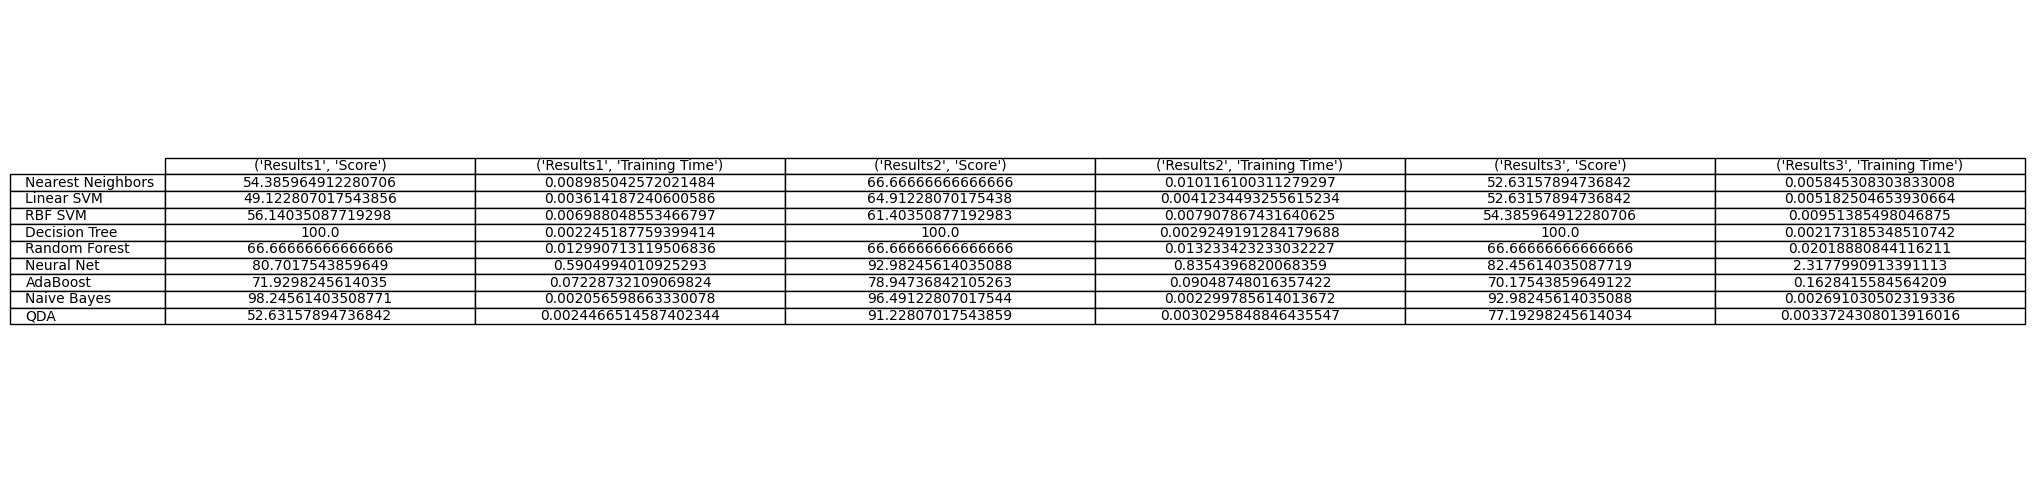

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert each results list to a DataFrame
df1 = pd.DataFrame(results_1).set_index('Classifier')
df2 = pd.DataFrame(results_12).set_index('Classifier')
df3 = pd.DataFrame(results_123).set_index('Classifier')

# Combine the DataFrames
combined_df = pd.concat([df1, df2, df3], axis=1, keys=['Results1', 'Results2', 'Results3'])

# Plot the combined DataFrame as a table
fig, ax = plt.subplots(figsize=(10, 6))  # set the size of the figure
ax.axis('off')  # turn off the axis
ax.table(cellText=combined_df.values,
         colLabels=combined_df.columns,
         rowLabels=combined_df.index,
         cellLoc='center', loc='center',
         colWidths=[0.4, 0.4, 0.4, 0.4, 0.4, 0.4])

plt.show()


The performance of the classifier improved when we added Dataset 2. It decreased after adding Dataset 3.